In [9]:
import warnings
import numpy as numps
import pandas as ajo

In [10]:
##Ignore warnings
warnings.filterwarnings('ignore')
##Get the movies from u.data file
categorical_names = ["user_id", "item_id", "rating", "timestamp"]
u_data = ajo.read_csv(r"C:\Users\SDKH\Downloads\ml-100k\ml-100k\u.data", sep="\t", names=categorical_names)
u_data.head()
u_data.shape

(100000, 4)

In [11]:
u_data["user_id"].nunique()


943

In [12]:
u_data["item_id"].nunique()

1682

In [27]:

all_movies = ajo.read_csv(r"C:\Users\SDKH\Downloads\ml-100k\ml-100k\u.item",sep='|',header=None,encoding='latin-1')

In [32]:
all_movies.shape

(1682, 2)

In [36]:
all_movies = all_movies.iloc[:,[0,1]]

In [37]:
all_movies.columns = ["item_id", "title"]

In [47]:
x_data = ajo.merge(u_data, all_movies, on="item_id")

In [48]:
print(x_data)

       user_id  item_id  rating  timestamp                         title
0          196      242       3  881250949                  Kolya (1996)
1          186      302       3  891717742      L.A. Confidential (1997)
2           22      377       1  878887116           Heavyweights (1994)
3          244       51       2  880606923    Legends of the Fall (1994)
4          166      346       1  886397596           Jackie Brown (1997)
...        ...      ...     ...        ...                           ...
99995      880      476       3  880175444  First Wives Club, The (1996)
99996      716      204       5  879795543     Back to the Future (1985)
99997      276     1090       1  874795795                 Sliver (1993)
99998       13      225       2  882399156         101 Dalmatians (1996)
99999       12      203       3  879959583             Unforgiven (1992)

[100000 rows x 5 columns]


In [49]:
import matplotlib.pyplot as plots
import seaborn as susybaka

In [46]:
u_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [50]:
quality = ajo.DataFrame(x_data.groupby('title').mean()['rating'])

In [51]:
quality['No. of reviews'] = x_data.groupby("title").count()['rating']

In [52]:
quality.sort_values(by='rating', ascending=False)

,rating,No. of reviews
title,,
Aiqing wansui (1994),5.0,1
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
...,...,...
"New Age, The (1994)",1.0,1
"Very Natural Thing, A (1974)",1.0,1
Vermont Is For Lovers (1992),1.0,1


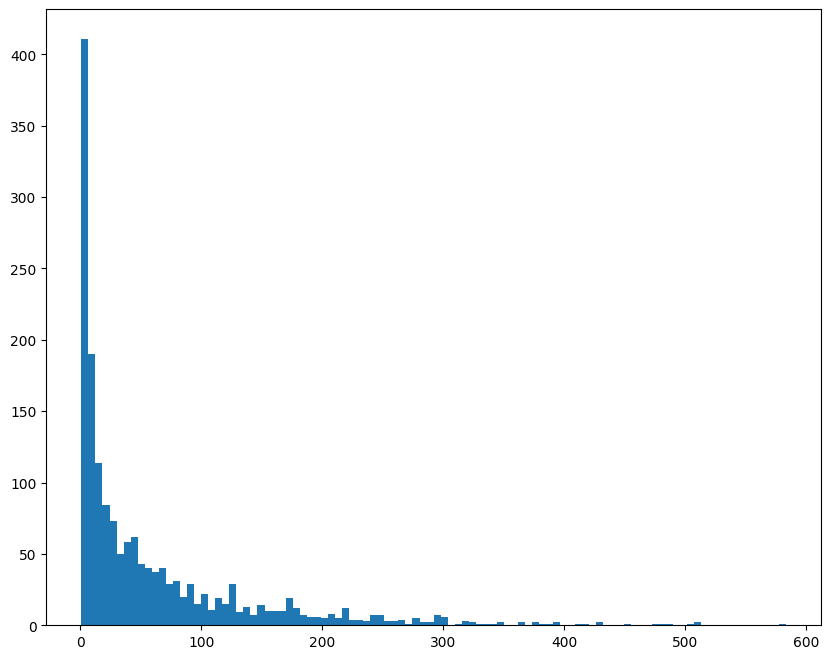

In [53]:
plots.figure(figsize=(10,8))
plots.hist(quality['No. of reviews'], bins=100)
plots.show()

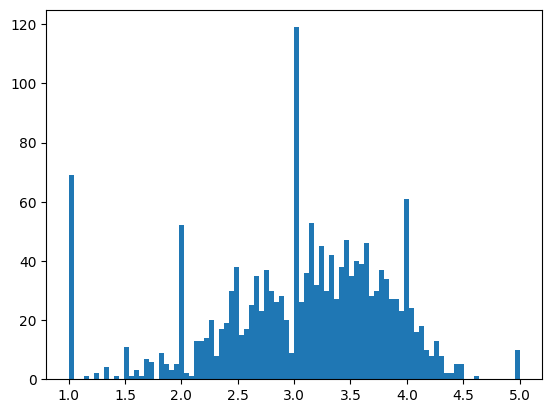

In [54]:
plots.hist(quality['rating'], bins = 90)
plots.show()

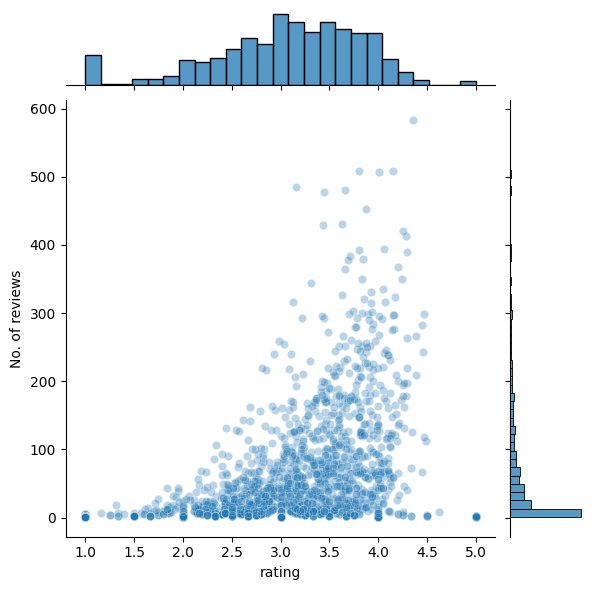

In [55]:
susybaka.jointplot(x='rating', y='No. of reviews', data=quality, alpha=0.3)

In [ ]:
#Recommendation of movies based on film choices of similar movie viewers

In [73]:
movieDB = x_data.pivot_table(index="user_id", columns="title", values="rating")
print(movieDB)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

In [76]:
quality.sort_values('No. of reviews', ascending=False)

,rating,No. of reviews
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Witness (1985),4.000000,1
All Things Fair (1996),3.000000,1
Wings of Courage (1995),4.000000,1


In [77]:
gits_rating = movieDB['Ghost in the Shell (Kokaku kidotai) (1995)']

In [79]:
gits_lite = movieDB.corrwith(gits_rating)

In [80]:
gits_like = ajo.DataFrame(gits_lite, columns=['Similar'])

In [81]:
gits_like.dropna(inplace = True)

In [82]:
gits_like.sort_values("Similar", ascending=False).head(10)

,Similar
title,
Gumby: The Movie (1995),1.0
"Walking Dead, The (1995)",1.0
Kansas City (1996),1.0
Beyond Rangoon (1995),1.0
Bhaji on the Beach (1993),1.0
Madonna: Truth or Dare (1991),1.0
Ghost in the Shell (Kokaku kidotai) (1995),1.0
Before Sunrise (1995),1.0
To Live (Huozhe) (1994),1.0


In [83]:
gits_like = gits_like.join(quality["No. of reviews"])

In [86]:
gits_like[gits_like["No. of reviews"]>81].sort_values("Similar", ascending=False)

,Similar,No. of reviews
title,,
"Room with a View, A (1986)",1.000000,134
Cold Comfort Farm (1995),1.000000,125
White Squall (1996),1.000000,85
Emma (1996),1.000000,177
Welcome to the Dollhouse (1995),1.000000,112
...,...,...
Mother (1996),-0.970725,169
Everyone Says I Love You (1996),-0.970725,168
I Know What You Did Last Summer (1997),-1.000000,100


In [88]:
def recommendations(movie):
    cinematic_rating = movieDB[movie]
    cinematic_lite = movieDB.corrwith(cinematic_rating)
    cinematic_like = ajo.DataFrame(cinematic_lite, columns=['Similar'])
    cinematic_like.dropna(inplace = True)
    cinematic_like = cinematic_like.join(quality["No. of reviews"])
    recommendationsforcinephiles = cinematic_like[cinematic_like["No. of reviews"]>81].sort_values("Similar", ascending=False)
    return recommendationsforcinephiles